Housing Prices

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso ,Ridge
from sklearn.metrics    import mean_squared_error,mean_absolute_error, r2_score,root_mean_squared_error

In [14]:
df = pd.read_csv('archive/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: ylabel='area'>

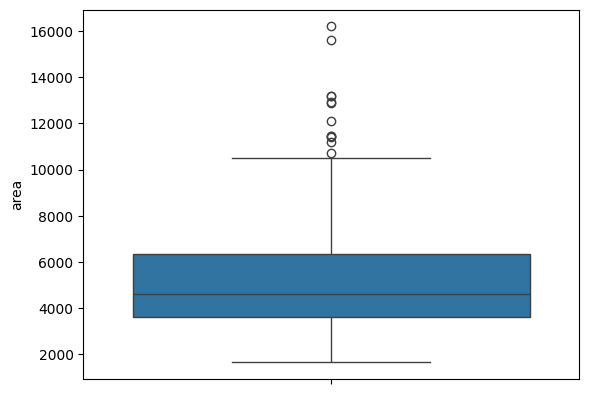

In [16]:
# sns.boxplot(df["price"])
sns.boxplot(df["area"])

<Axes: ylabel='area'>

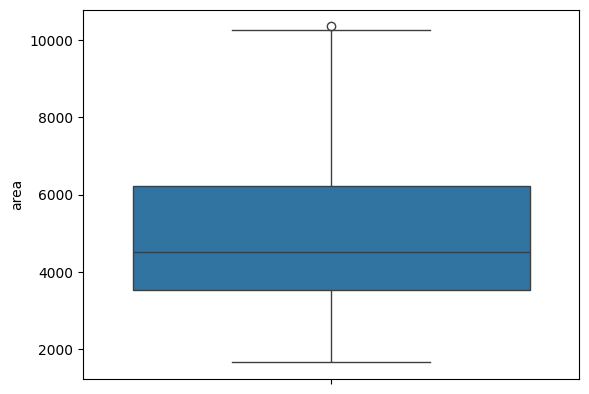

In [17]:
q1 = df["area"].quantile(0.25)
q3 = df["area"].quantile(0.75)

IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR
df = df[(df["area"] < upper) & (df["area"] > lower)].copy()
sns.boxplot(df["area"])



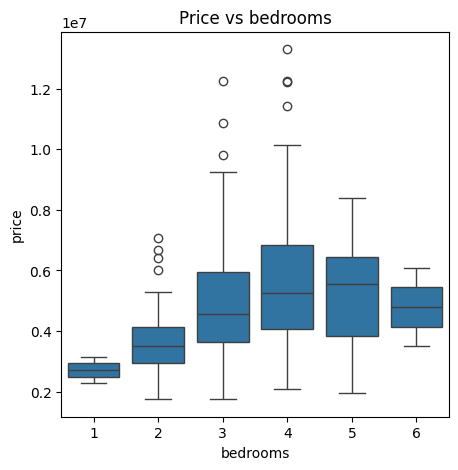

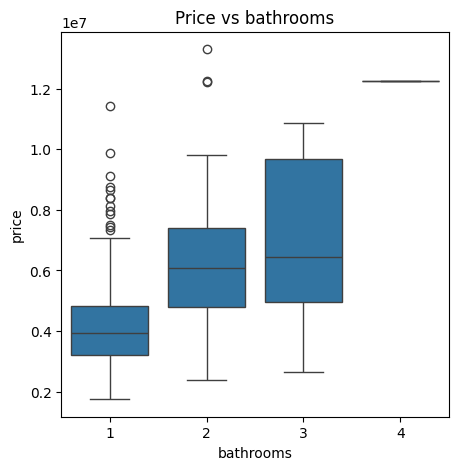

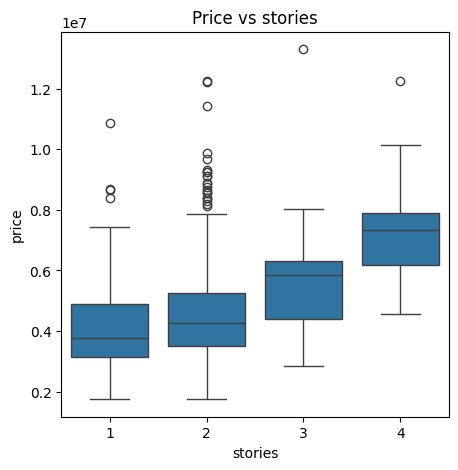

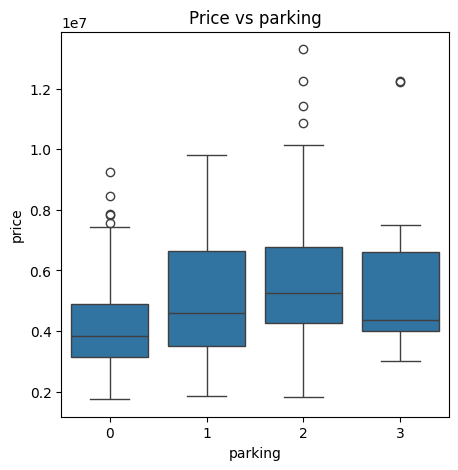

In [18]:
comp = [ 'bedrooms', 'bathrooms', 'stories', 'parking']
for i in comp:
    plt.figure(figsize=(5,5))
    sns.boxplot(x= df[i] , y = df["price"])
    plt.title("Price vs "+i)
    plt.show()

In [19]:
df.T

,0,1,2,3,4,5,6,8,9,11,...,535,536,537,538,539,540,541,542,543,544
price,13300000,12250000,12250000,12215000,11410000,10850000,10150000,9870000,9800000,9681000,...,2100000,1960000,1890000,1890000,1855000,1820000,1767150,1750000,1750000,1750000
area,7420,8960,9960,7500,7420,7500,8580,8100,5750,6000,...,3360,3420,1700,3649,2990,3000,2400,3620,2910,3850
bedrooms,4,4,3,4,4,3,4,4,3,4,...,2,5,3,2,2,2,3,2,3,3
bathrooms,2,4,2,2,1,3,3,1,2,3,...,1,1,1,1,1,1,1,1,1,1
stories,3,4,2,2,2,1,4,2,4,2,...,1,2,2,1,1,1,1,1,1,2
mainroad,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,no,yes,yes,no,yes,no,yes,no,yes
guestroom,no,no,no,no,yes,no,no,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
basement,no,no,yes,yes,yes,yes,no,yes,no,yes,...,no,no,no,no,no,yes,no,no,no,no
hotwaterheating,no,no,no,no,no,no,no,no,no,yes,...,no,no,no,no,no,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes,yes,yes,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no


In [20]:
features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in features:
    df[feature] = df[feature].map({'yes':1,'no':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [21]:

df["furnishingstatus"] = df["furnishingstatus"].map({'furnished':2,'semi-furnished':1,'unfurnished':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [24]:
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25)
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
num_features= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']



X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

In [25]:
X_train_scaled

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
512,-1.103784,-1.291307,-0.574265,0.183470,1,0,0,0,0,-0.766214,0,2
145,0.045239,0.050706,-0.574265,2.495775,1,0,0,0,0,-0.766214,0,2
303,-0.242017,0.050706,-0.574265,-0.972683,1,0,1,0,0,-0.766214,0,2
17,2.056028,0.050706,1.425589,2.495775,1,0,0,0,1,1.546994,0,2
467,-0.965901,0.050706,-0.574265,0.183470,1,0,0,0,0,1.546994,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
517,-1.103784,-1.291307,-0.574265,-0.972683,1,0,0,0,0,0.390390,0,0
137,-0.161585,1.392719,-0.574265,0.183470,1,0,0,0,0,0.390390,0,1
325,-0.839508,1.392719,-0.574265,0.183470,1,0,0,0,1,-0.766214,0,1
265,-1.172725,0.050706,-0.574265,0.183470,1,0,0,0,0,-0.766214,1,1


In [30]:
 
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)

y_train_pred_lin = reg.predict(X_train_scaled)
y_test_pred_lin = reg.predict(X_test_scaled)
print("Linear regression result:")
print("Train R2:",r2_score(y_train,y_train_pred_lin))
print("Test R2:",r2_score(y_test,y_test_pred_lin))
print("MAE:",mean_absolute_error(y_test,y_test_pred_lin))
print("MSE:",mean_squared_error(y_test,y_test_pred_lin))
print("RMSE:",root_mean_squared_error(y_test,y_test_pred_lin))


Linear regression result:
Train R2: 0.643631393049001
Test R2: 0.7299374812599784
MAE: 744401.6756831914
MSE: 1123163234085.4683
RMSE: 1059793.9583171194


In [32]:
rid=Ridge(alpha = 10)
rid.fit(X_train_scaled,y_train)

y_train_pred_lin = rid.predict(X_train_scaled)
y_test_pred_lin = rid.predict(X_test_scaled)
print("ridge regression result:")
print("Train R2:",r2_score(y_train,y_train_pred_lin))
print("Test R2:",r2_score(y_test,y_test_pred_lin))
print("MAE:",mean_absolute_error(y_test,y_test_pred_lin))
print("MSE:",mean_squared_error(y_test,y_test_pred_lin))
print("RMSE:",root_mean_squared_error(y_test,y_test_pred_lin))

ridge regression result:
Train R2: 0.6418626884114655
Test R2: 0.7200565684636029
MAE: 753290.7269025046
MSE: 1164256970542.7554
RMSE: 1079007.4005968426


In [33]:
lass=Lasso(alpha=0.1)
lass.fit(X_train_scaled,y_train)

y_train_pred_lin = lass.predict(X_train_scaled)
y_test_pred_lin = lass.predict(X_test_scaled)
print("Lasso regression result:")
print("Train R2:",r2_score(y_train,y_train_pred_lin))
print("Test R2:",r2_score(y_test,y_test_pred_lin))
print("MAE:",mean_absolute_error(y_test,y_test_pred_lin))
print("MSE:",mean_squared_error(y_test,y_test_pred_lin))
print("RMSE:",root_mean_squared_error(y_test,y_test_pred_lin))

Lasso regression result:
Train R2: 0.6436313930488434
Test R2: 0.7299373835041446
MAE: 744401.700185062
MSE: 1123163640642.2866
RMSE: 1059794.1501264698


In [34]:
print("target variable stats")
print("Mean:",y.mean())
print("Median:",y.median())
print("Min:",y.min())
print("Max:",y.max())


target variable stats
Mean: 4720138.566037736
Median: 4273500.0
Min: 1750000
Max: 13300000
